(ch:sample-distribution)=
# 표본분포(준비중)

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [35]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [36]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [37]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [38]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [40]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

표본 분포의 주요 개념을 소개한다.

- 표본평균의 분포
- 중심극한정리
- 큰 수의 법칙

## 독립동일분포

...

## 독립성

...

## 정규분포 연산

### 합과 차

상호 독립인 확률변수 $X$와 $Y$가 정규분포를 따른다고 가정한다.

$$
X \sim N(\mu_X, \sigma_X^2) \qquad Y \sim N(\mu_y, \sigma_y^2)
$$

그러면 두 확률 번수의 합과 차를 확률변수 $X+Y$와 $X-Y$ 모두 정규분포를 따르며
두 분포가 따르는 정규분포는 다음과 같다.

$$
X+Y \sim N(\mu_X+\mu_Y,\sigma_{X}^{2}+\sigma_{Y}^{2}) \qquad X-Y \sim N(\mu_X-\mu_Y,\ \sigma_{X}^{2}+\sigma_{Y}^{2})
$$

즉, $X+Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 합과 분산의 합으로,
$X-Y$의 평균값과 분산은 두 확률변수 각각의 평균값의 차와 분산의 합으로 계산된다.
$X+Y$와 $X-Y$의 분산이 두 확률변수 각각의 분산의 합으로 계산되는 이유를 직관적으로 설명하기 위해
다음 두 예제를 이용한다.

**예제: 신랑, 신부 체중의 합의 분포**

해야 할 일: 아래 분포를 따라는 남녀 키 데이터를 생성해서 활용할 것.
상호 독립이어야 함.

- 전제
  - 신부의 체중 $X ∼ N(150,400)$
  - 신랑의 체중 $Y ∼ N(190, 500)$

  ⇒ 신랑 + 신부의 체중 $∼ N(340,900)\ _{= N(150+190=340,\ \ 400+500,900)}$
> *신랑과 신부의 체중은 상호 독립이라고 가정*

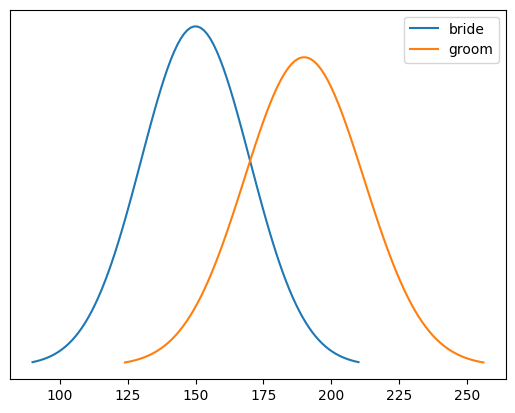

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 정규분포의 평균과 표준편차
mu_w, sigma_w = 150, 20
mu_m, sigma_m = 190, 22

# x축 범위
x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)

# 정규분포 공식을 이용한 y값 계산
y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))

# 그래프 출력
plt.plot(x, y, label="bride")
plt.plot(x2, y2, label="groom")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

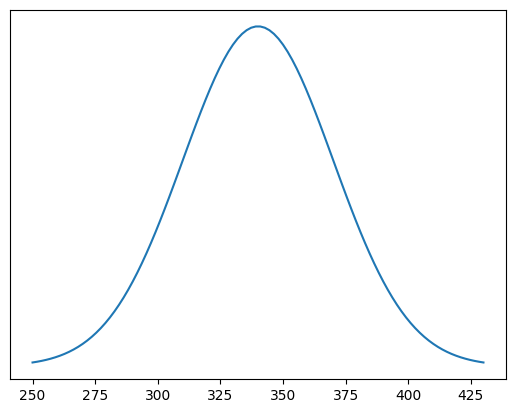

In [8]:
# 신랑 + 신부 
mu, sigma = 340, 30 

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 그래프 출력
plt.plot(x, y)
plt.gca().yaxis.set_visible(False)
plt.show()


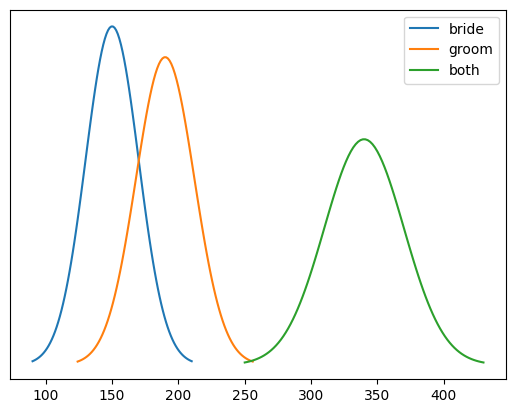

In [9]:
# 전체 비교
mu_w, sigma_w = 150, 20
mu_m, sigma_m = 190, 22
mu_sum, sigma_sum = 340, 30

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)
x3 = np.linspace(mu_sum - 3*sigma_sum, mu_sum + 3*sigma_sum, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))
y3 = 1/(sigma_sum * np.sqrt(2 * np.pi)) *np.exp(-(x3 - mu_sum)**2 / (2 * sigma_sum**2))

# 그래프 출력
plt.plot(x, y, label="bride")
plt.plot(x2, y2, label="groom")
plt.plot(x3, y3, label="both")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

"신랑 + 신부"의 모양이 보다 납작해진다. 이유는 분산이 커지기 때문이다

연속데이터를 다루는 두 정규분포의 합도 연속데이터를 다루는 정규분포를 따른다.    
또한, 새로운 정규분포의 기대치와 분산은 각각의 기대치 또는 분산을 이용하여 아래와 같이 구한다.

- 전제 : $X ∼N(μ_x, 𝜎^2_x), Y ∼ N(μ_y, 𝜎_y^2)\ \ \ _{(서로\ 독립)}$
- 결론 :  $⇒ \begin{pmatrix} 
E(X+Y) = μ_x+μ_y,\ \  Var(X+Y)=Var(X)+Var(Y) \\
X+Y ∼N(μ_x+μ_y,\ \  𝜎_x^2+𝜎_y^2)
\end{pmatrix}$

신부와 신랑의 체중의 합이 380 파운드 이하일 확률은?

$$
P(X+Y<380)= P(Z<\frac{380-340}{30})=P(Z<1.33)=0.9082
$$

**예제: 결혼 중매 참여 남자, 여자의 키 차이**

- 전제
  - 남자의 키 $X ∼ N(71, 20.25)$
  - 여자의 키 $Y ∼ N(64,16)$

- 결론     
  ⟹ 남자의 키와 여자의 키의 차이의 분포 $∼N(7, 36.25)_{=N(71-64, 20.25+16)}$

> 남자와 여자의 키는 상호 독립이라고 가정

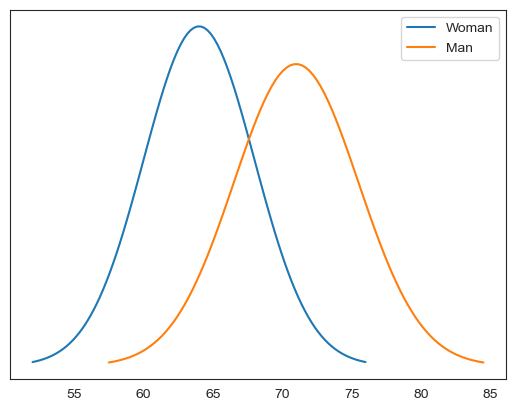

In [23]:
mu_w, sigma_w = 64, 4
mu_m, sigma_m = 71, 4.5 

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))

plt.plot(x, y, label="Woman")
plt.plot(x2, y2, label="Man")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

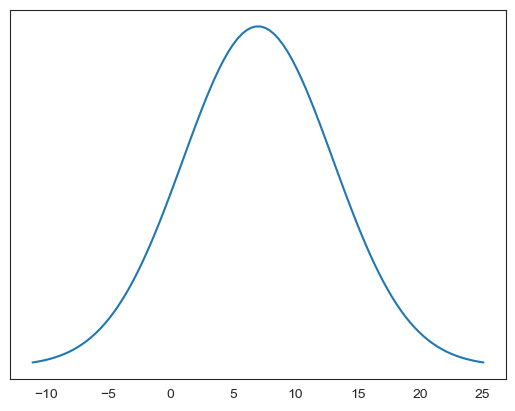

In [24]:
#  남자 + 여자
mu, sigma = 7, 6.02

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 그래프 출력
plt.plot(x, y)
plt.gca().yaxis.set_visible(False)
plt.show()

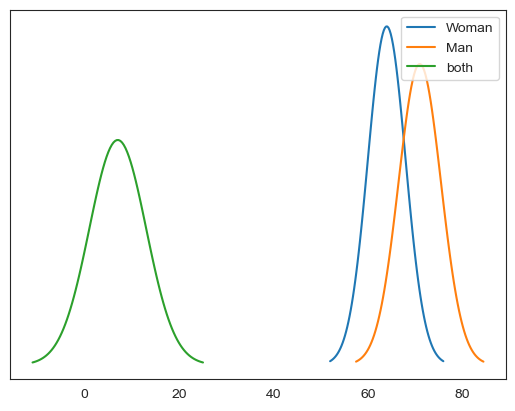

In [26]:
# 전체 비교
mu_w, sigma_w = 64, 4
mu_m, sigma_m = 71, 4.5
mu_sum, sigma_sum = 7, 6.02

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)
x3 = np.linspace(mu_sum - 3*sigma_sum, mu_sum + 3*sigma_sum, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))
y3 = 1/(sigma_sum * np.sqrt(2 * np.pi)) *np.exp(-(x3 - mu_sum)**2 / (2 * sigma_sum**2))

# 그래프 출력
plt.plot(x, y, label="Woman")
plt.plot(x2, y2, label="Man")
plt.plot(x3, y3, label="both")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

"남자 - 여자"의 모양이 보다 납작해진다. 이유는 분산이 커지기 때문이다.

연속데이터를 다루는 두 정규분포의 차이도 연속데이터를 다루는 정규분포를 따른다.    
또한, 새로운 정규분포의 기대치와 분산은 각각의 기대치 또는 분산을 이용하여 아래와 같이 구한다.

- 전제 : $X ∼N(μ_x, 𝜎^2_x), Y ∼ N(μ_y, 𝜎_y^2)\ \ \ _{(서로\ 독립)}$
- 결론 :  $⇒ \begin{pmatrix} 
E(X-Y) = μ_x-μ_y,\ \  Var(X-Y)=Var(X)+Var(Y) \\
X-Y ∼N(μ_x-μ_y,\ \  𝜎_x^2+𝜎_y^2)
\end{pmatrix}$

남자와 여자의 키의 차이가 5인치 이상일 확률은?

$$
P(X-Y>5)= P(Z>\frac{5-7}{6.02})=P(Z>-0.33)=P(Z<0.33)=0.6293
$$

주의사항: 정규분포 그래프는 평균을 중심으로 해서 좌우 대칭

**상호 독립성의 중요성: 피어슨  데이터셋**

**주의사항**

- $X$와 $Y$가 상호 독립이지 않은 경우를 다뤄야 함.
- 예를 들어 피어슨 데이터셋의 아버지와 아들의 키 데이터셋. 아버지 키와 아들 키는 독립적일 수 없음.

아래 코드는 피어슨<font size='2'>Pearson</font>이 1903년에 실험을 위해 수집한
아버지와 아들의 키로 구성된 데이터셋을 불러온다.
원래 인치 단위를 사용하지만 편의를 위해 센티미터 단위로 변환되었다.

In [60]:
pearson = pd.read_csv(data_url+"pearson_dataset.csv", header=0)

pearson.head()

,Father,Son
0,165.1,151.9
1,160.8,160.5
2,165.1,160.8
3,167.1,159.5
4,155.2,163.3


아버지 키와 아들 키 각각 총 1,078개의 부동소수점 값이 포함되었다.

In [61]:
pearson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


**아버지 키와 아들 키의 상관관계**

- 공분산

In [62]:
pearson.cov(ddof=0)

,Father,Son
Father,48.612085,24.984513
Son,24.984513,51.125832


- 피어슨 상관계수

In [64]:
pearson.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


결론: 아버지키와 아들 키는 상호 독립이 아님.

- 아버지 키와 아들 키 합 데이터 추가

In [65]:
pearson['Father+Son'] = pearson['Father'] + pearson['Son']
pearson.head()

,Father,Son,Father+Son
0,165.1,151.9,317.0
1,160.8,160.5,321.3
2,165.1,160.8,325.9
3,167.1,159.5,326.6
4,155.2,163.3,318.5


In [66]:
pearson_desc = pearson.describe()
pearson_desc

,Father,Son,Father+Son
count,1078.000000,1078.000000,1078.000000
mean,171.922635,174.457978,346.380612
std,6.975473,7.153552,12.241158
min,149.900000,148.600000,307.800000
25%,167.100000,169.900000,338.025000
50%,172.200000,174.200000,346.400000
75%,176.800000,179.100000,354.800000
max,191.500000,199.100000,381.000000


- 평균값의 합

In [67]:
mu_FS = pearson_desc.loc['mean', 'Father'] + pearson_desc.loc['mean', 'Son']
mu_FS

346.380612

- 분산의 합

In [68]:
sigma_FS_squared = pearson_desc.loc['std', 'Father'] ** 2 + pearson_desc.loc['std', 'Son'] ** 2
sigma_FS_squared

99.830524

- 이론적인 아버지 키와 아들 키의 합의 표준편차

In [69]:
sigma_FS = np.sqrt(sigma_FS_squared)
sigma_FS

9.991523

이론과 실제 계산된 표준편차가 많이 다르다.

- 실제 아버지 키와 아들 키의 합의 표준편차

In [70]:
sigma_FaddS = pearson_desc.loc['std', 'Father+Son']
sigma_FaddS

12.241158

- (아버지 키 + 아들 키)의 이론적 정규분포

In [71]:
from scipy.stats import norm

X_FS = norm(mu_FS, sigma_FS)

- 확률 밀도 함수 그래프로 구분하기

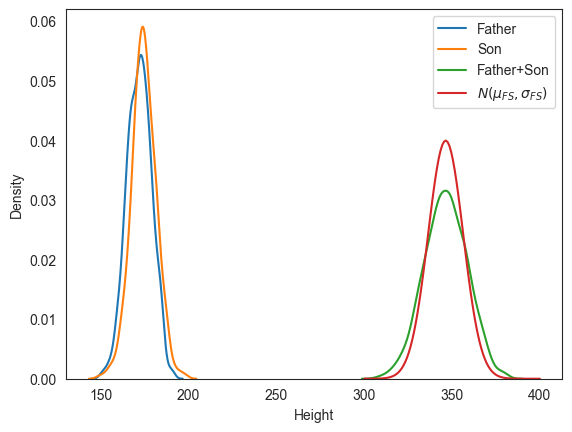

In [72]:
fig, ax = plt.subplots()

# KDE 기법으로 계산된 확률 밀도 함수 그래프
# 아버지 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Father'], label='Father')
# 아들 키의 정규분포
sns.kdeplot(ax=ax, data=pearson['Son'], label='Son')
# (아버지 키+아들 키)의 실제 분포: 정규분포 아님
sns.kdeplot(ax=ax, data=pearson['Father+Son'], label='Father+Son')

# (아버지 키+아들 키)의 이론적 정규분포
x = np.linspace(300, 400, 100)
ax.plot(x, X_FS.pdf(x), label=r'$N(\mu_{FS}, \sigma_{FS})$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()
plt.show()

결론

- 두 정규분포가 독립이 아니면 합의 분산은 언급된 공식으로 계산되지 않는다.
- 아버지 키와 많이 다른 아들 키가 존재할 수 있기 때문으로 추정된다. (?)

### 정규분포 선형 변환

* 전제
$$X ∼ N(μ, 𝜎^{2})$$

* 결론
$$⇒\ aX+b ∼ N(aμ+b,\ a^{2}𝜎)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, 중력이 지구의 4배인 행성이 있고 모든 한국인이 그 행성으로 이주했다고 가정하자.      
그러면 모든 한국인의 체중이 지구에서의 체중의 4배로 늘어난다. 따라서 체중의 평균도 4배, 즉 4μ가 된다.

반면에, 체중의 분산은 지구에서의 경우보다 $4^2배,\ 즉\ 16𝜎^2$이 된다.

따라서, 새로운 행성에서의 한국인 체중은 아래의 분포를 따른다

$$
4X∼ N(4μ,16𝜎^2)
$$

$4X$는 사람들의 체중이 4배되었음을 의미한다.

이렇게 기존에 사용된 데이터가 $ax+b의\ 방식으로\ 변하면,\ _{(기존\ 데이터의\ 각각의\ 값을\ a배한\ 후\ b를\ 더해주는\ 방식)}$,
즉, **선형 변환**을 하면 새로운 데이터의 평균과 분산은 아래와 같이 변한다.

$$
aX+b ∼ N(a⋅μ+b,\ \ a^2𝜎^2)
$$

### 정규분포의 독립 관측

* 전제
$$X ∼ N(μ, 𝜎^{2})$$
$$⇒ X_{1}, ⋯, X_ n\ 모두\ X의\ 독립\ 관측$$ 

* 결론
$$X_1+⋯+X_n ∼ N(nμ, n𝜎^2)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, <u>한국인 성인 4명을 무작위로, 그리고 상호 독립적으로 선발</u>하였을 때 4명 체중의 합의 평균은 4μ이다.

또한, 4명 체중의 합의 분산도 $4𝜎^2$이 된다.

무작위적이며 상호 독립적인 방식으로 4명을 선택하여 합한 체중의 분포를 $X+X+X+X$로 표기한다

> $X+X+X+X$는 4명을 무작위적이며, 서로 아무 상관없이 독립적으로 선택한다는 의미

이때 $X+X+X+X ∼ N(4μ,4𝜎^2)$이 성립한다.

일반적으로 아래 공식이 성립한다.

$$
X_1+X_2+⋯+X_n ∼ N(nμ,n𝜎^2)
$$

단, $X_i$는 모두 $X$의 독립관측이다. ($X$를 독립적으로 $n$번 반복한다는 의미)

**캘리포니아 주택가격 데이터셋**

캘리포니아 주택가격 데이터셋을 계속해서 활용한다.

- 캘리포니아 주택가격 데이터셋

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 가구중위소득과 주택중위가격만 활용

In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


- 이상치 제거: 중위주택가격이 50만을 초과하는 경우 삭제. 이후 인덱스 초기화

In [9]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


In [10]:
total_number = housing.shape[0]
total_number

19675

## 합의 분포

...

## 표본평균의 분포

**10% 표본추출**

In [31]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value
district,,
15377,4.1116,187500.0
282,5.9849,371000.0
5346,2.8106,184400.0
12420,1.8589,144000.0
8840,4.3182,252700.0
...,...,...
16738,2.5804,216300.0
15067,2.3887,337500.0
13340,1.7062,86800.0


**표본추출 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [32]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 표본추출:")
    print(sampling.mean())
    print()

1번째 표본추출:
median_income              3.679355
median_house_value    193633.197763
dtype: float64

2번째 표본추출:
median_income              3.657730
median_house_value    192268.378241
dtype: float64

3번째 표본추출:
median_income              3.686453
median_house_value    194232.130147
dtype: float64

4번째 표본추출:
median_income              3.702366
median_house_value    197300.254194
dtype: float64

5번째 표본추출:
median_income              3.683035
median_house_value    193355.210981
dtype: float64



In [33]:
sampling

,median_income,median_house_value
district,,
5212,3.3955,225000.0
17995,6.8872,305200.0
8700,5.1163,233200.0
737,3.4722,135400.0
11647,2.4554,89400.0
...,...,...
6484,3.5875,309300.0
11136,3.0870,196900.0
19440,4.9234,241400.0


아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모은다.

In [34]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [35]:
np.mean(income_mean)

3.676986

표본평균의 분산이 매우 작다.

In [36]:
np.var(income_mean)

0.001269

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [37]:
housing['median_income'].mean()

3.676717

## 연습문제

참고: [(연습) 표본 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling_distribution.ipynb)